Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:



In [1]:
NAME = "Henry Park"
COLLABORATORS = ""



## Final project











## Project











Your final project will be a PDF derived from a Jupyter notebook. Your notebook should read like a technical report, with sections to organize the contents, complete sentences, and paragraphs with interspersed code cells and results. The lecture notes are a reasonable model for what I am expecting from you. There is not a hard length; it should be appropriate for your topic. 

Your report will be graded in these areas.











### Technical content











You should explain what your code is doing, the code should follow the style and conventions used in the lecture notes. You should also explain what your results mean, and provide some context around them. For example, if you are reproducing some analysis, do your results agree? If not, why? If you are developing an algorithm how can you tell if it works? What are the benefits of it compared to others?

Your work should be original. I do not want to see small derivatives of existing work, or copied examples from the internet. If you used existing works, you should take care to cite them (with a URL to access them).











### Presentation











I expect full sentences and paragraphs, with limited typos and grammatical mistakes. If you have used external content for something you should have reference (a URL is fine) to indicate that.

The writing should be suitable for a non-expert to read, especially consider what a job recruiter would think about it. Would they be interested in hiring you after reading it? Would a first-year MS student understand what you have written and learn from it.









# Introduction











### Monte Carlo Estimation

Monte Carlo (MC) method utilizes theory of large numbers and iterative random sampling in solving wide range of problems. Its applications include testing wireless network with simulated users in telecommunication, tracing the light path to render 3D graphics in computer graphics, and simulating the effect of pollutants in environmental engineering. It is also utilizable in fields of artificial intelligence like model-free reinforcement learning.

The law of large numbers (LLN) states that the average of the results from a large number of trials should converge to the expected value:

**Law of Large Numbers**

Let $X_i$ be independent identically-distributed (i.i.d) random variables.

For $i = 1,...,N,$ where $N$ is the number of trials, 
\begin{equation}
E(X_i) = \mu \\
Var (X_i) = \sigma^2 \\
\bar{X}_n = \lim_{N \rightarrow \infty} \cfrac{\sum_{i=1}^{N}X_i}{N}
\end{equation}

**Quick Example: Fair die**

Let $P(X_i)$ be the probability of $i$ showing up in a fair die throw.

Throwing a fair die enough number of times ($N$ times) would give $P(1) \approx P(2) \approx ...\approx P(6) \approx \cfrac{1}{6},$ and eventually converge to exact probabilities of $\cfrac{1}{6}$ when $N$ increases to $\infty$.

For example, probability of one showing up in a throw can be expressed as
\begin{equation}
\bar{X}_n = \lim_{N \rightarrow \infty} \cfrac{\sum_{i=1}^{N}X_i}{N} \\
\cfrac{1}{6} = \cfrac{\text{Number of times one showed up}}{\text{Total number of throws}}
\end{equation}



In [2]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import random
import time

To simulate the dice throw in Python, the **dice_throw** function was defined. The function outputs a random integer between 1 and 6.

Try several times to see different results from dice throw.

In [3]:
def dice_throw():
    return random.randint (1,6)

# example of dice_throw function
dice_throw ()

3

In the cell below, the trial is done $N=10,000$ times and the outcomes are stored to calculate the probabilities of each outcome ($1,2,...,6$). The list $\text{occurrences}$ shows how many times each outcome had occurred after $N$ throws. Next, the probabilities are calculated from the occurrences and stored to the a list named $\text{probabilities}$. A $\text{runtime}$ function was also defined to time the Monte Carlo simulation as it can be computationally expensive when number of trials are increased.

In [4]:
def runtime (start):
    now = time.time()
    taken = now - start
    print (f"Runtime: {taken:1.4f} s")

In [5]:
# seed
random.seed (1)
start = time.time() # for runtime function

N = 10000 # number of trials
outcomes = []
probabilities = []

for i in range (N):
    outcome = dice_throw()
    outcomes.append (outcome) # outcome in [1,2,3,4,5,6]
    
    # number of occurrences of each outcome
    occurrences = [outcomes.count(j) for j in range (1,7)]
    occurrences = np.array (occurrences)
    
    # probabilities are updated each loop
    probabilities.append (list(occurrences/(i+1)))
    
probabilities=np.array(probabilities)
runtime(start)

Runtime: 1.8833 s


The first element in the list $\text{probabilities}$ refers to the probability after the first dice throw, and the last element is the final probabilities after $N$ throws. In other words, elements with index $(i-1)$ has the probabilities after $i$th throw. See the printed statements in the code cell below.

In [6]:
# prob after a single throw
print (f"Probabilities after the first throw: {probabilities[0]}")

# prob after N throws
print (f"Probabilities after N throws: {probabilities[-1]}")

# analytical
print (f"Actual probability: {1/6:1.4f}")

Probabilities after the first throw: [0. 1. 0. 0. 0. 0.]
Probabilities after N throws: [0.1624 0.1699 0.1649 0.1686 0.1715 0.1627]
Actual probability: 0.1667


**Probability after a single throw:** One of the probabilities equals $1.0$, and the rest are $0$ since there is only one outcome provided.

**Probability after N throws:** All six probabilities converge to $\approx \frac{1}{6}$.

The plot below shows the expected converging behavior from Monte Carlo simulation of dice throws. The black dotted horizontal line is the line where the probability equals $\frac{1}{6}.$

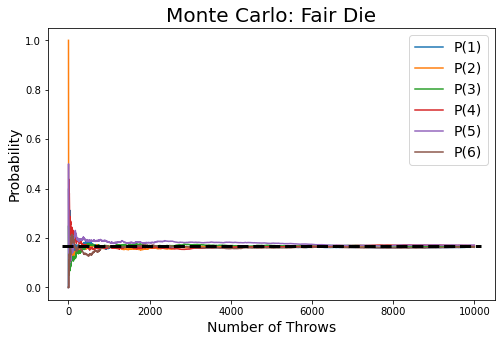

In [7]:
# plot probabilities for each outcome
plt.figure (figsize=(8,5))
plt.plot (probabilities)

# horizontal line to show the known probability of 1/6
plt.axhline (1/6, ls='--', lw=3, c='k', xmin=0.03, xmax=0.97)

plt.legend (["P(1)","P(2)","P(3)","P(4)","P(5)","P(6)"], fontsize=14)
plt.xlabel ("Number of Throws", fontsize=14)
plt.ylabel ("Probability", fontsize=14)
plt.title ("Monte Carlo: Fair Die", fontsize=20) ;

# MC Numerical Integration

Monte Carlo methods can also be used to numerically approximate definite integrals. For example, an integral $\int_{0}^{\pi} \text{e}^{\text{sin}(x)} dx$ does not have an easy analytical solution to its integral, but the integral can be calculated using numerical integration. In Monte Carlo integration, $x$ values are randomly selected to partition the function into $N+1$ pieces, then the Riemann sum of those partitions are calculated.

$\text{E}[f(x)] \equiv \text{Expected value of a function} f(x) \text{, or mean}$

$\text{E}[f(x)] = \frac{1}{b-a} \int_{a}^{b} f(x) dx$

$(b-a) \cdot \text{E}[f(x)] = \int_{a}^{b} f(x) dx$

For $N$ discrete samples,

$(b-a) \left[ \frac{1}{N} \sum_{i=1}^{N} f(i) \right] \approx \int_{a}^{b} f(x) dx$

In other words, 

\begin{equation}
(b-a) \cdot \text{MEAN}(f(x)) = \int_{a}^{b} f(x) dx \text{  as } N \rightarrow \infty
\end{equation}

First, the function to integrate needs to be defined. The plot below shows the original function curve.

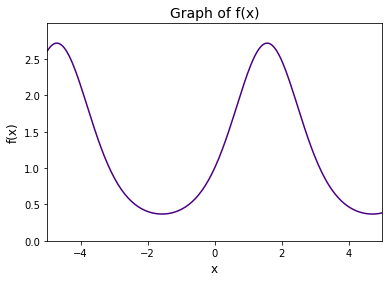

In [8]:
# function to integrate
# No analytical solution
def f(x):
    return np.exp(np.sin(x))

# limits of integration
a = 0
b = np.pi

# original function plot
x=np.linspace(-5, 5, 200)
ylim = 1.1*f(x).max()

plt.plot (x, f(x), "indigo")
plt.xlim ([x.min(), x.max()])
plt.ylim ([0, ylim])
plt.xlabel ("x",fontsize=12)
plt.ylabel ("f(x)",fontsize=12)
plt.title ("Graph of f(x)",fontsize=14) ;

The code below provides a visualization of partitions using $N$ random $x$'s.

Uniformly distributed random numbers ($x$) taken from the range between the integration bounds are stored in an array. Then for each of those random $x$'s, bar plots with a height of $f(x)$ are generated to visualize the $N+1$ partitions and their function values were added to calculate the Riemann sum. For each example, number of trials ($N$), runtime, and value of the integral are printed out for comparison.

#### ex.) $N=5$

N = 5
Value of the integral: 5.952
Runtime: 0.0160 s


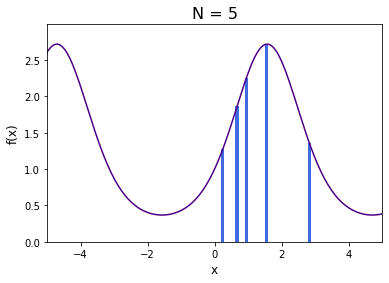

In [9]:
# number of random simulations
N = 5

# choose N random values of x to partition the function
random.seed(32)
rand = [random.uniform(a,b) for i in range(N)]
rand = np.array (rand)


summation = 0.0 # cumulate all areas of each random x
start = time.time()

for i in range (N):
    # Visualizing partitions
    plt.bar (rand[i], height = f(rand[i]), width=0.1, color="royalblue")
    
    # Calculating the riemann sum
    summation += f(rand[i])

print (f"N = {N}")
    
# E[f(x)] and integral F(x)
mean = summation/N
integral = (b-a)*mean
print (f"Value of the integral: {integral:1.3f}")

ylim = 1.1*f(x).max()
plt.plot (x, f(x), "indigo")
plt.xlim ([x.min(), x.max()])
plt.ylim ([0, ylim])
plt.xlabel ("x",fontsize=12)
plt.ylabel ("f(x)",fontsize=12)
plt.title (f"N = {N}",fontsize=16)
runtime(start)

#### ex.) $N=5000$

N = 5000
Value of the integral: 6.181
Runtime: 2.6985 s


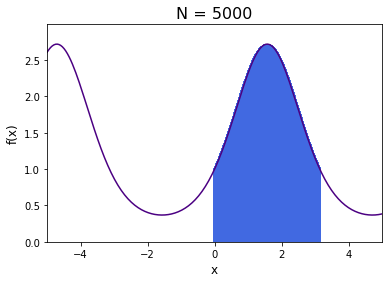

In [10]:
N = 5000

random.seed(1)
rand = [random.uniform(a,b) for i in range(N)]
rand = np.array (rand)


summation = 0.0
start = time.time()

for i in range (N):
    plt.bar (rand[i], height = f(rand[i]), width=0.1, color="royalblue")
    summation += f(rand[i])
mean = summation/N
integral = (b-a)*mean


#### print/plot results
print (f"N = {N}")
print (f"Value of the integral: {integral:1.3f}")

ylim = 1.1*f(x).max()
plt.plot (x, f(x), "indigo")
plt.xlim ([x.min(), x.max()])
plt.ylim ([0, ylim])
plt.xlabel ("x",fontsize=12)
plt.ylabel ("f(x)",fontsize=12)
plt.title (f"N = {N}",fontsize=16)

runtime(start)

An integral of a function can be represented by the area under the function curve in the range of integration. From the above examples, it is shown that the randomly generated rectangular bars cover nearly all of the area under the curve in the range of $[0, \pi]$ as $N$, increases. 

### Comparison to other numerical integration tools

Comparison to other numerical integration techniques in Python (*scipy.integrate.quad* and *np.trapz*) are shown below.

In [11]:
# Comparison
from scipy.integrate import quad

startquad = time.time()
a,b = 0,np.pi
F_quad, err = quad (f, a, b)

print (f"quad: {F_quad}")
print (f"absolute error: {err}")
runtime (startquad)

quad: 6.20875803571111
absolute error: 4.0511694074940233e-10
Runtime: 0.0010 s


Since it can be inferred from the absolute error that the *quad* integral is accurate to 9th decimal places. Thus, the *quad* solution can be considered as the actual solution unless the solution has to be more precise than 9th decimal places. The result from quad was then compared with solutions from other methods to calculate the errors.

In [12]:
starttrapz = time.time()
X = np.linspace (a, b, N)

F_trapz = np.trapz(f(X), X)
err_trapz = np.abs (F_quad-F_trapz)

print (f"trapz: {F_trapz}")
print (f"Error relative to quad: {err_trapz}")
runtime (starttrapz)

trapz: 6.2087579698874205
Error relative to quad: 6.582368961005614e-08
Runtime: 0.0018 s


In [13]:
err_mc = np.abs (F_quad-integral)

print (f"MC: {integral}")
print (f"Error relative to quad: {err_mc:1.6f}")
# MC runtime was about 4.7s for 5000 samples.

MC: 6.180852373461234
Error relative to quad: 0.027906


To keep the runtime manageable, $N$ was kept to 5000 which leads to only a rough estimate of the objective integral. See the screenshot below for result when $N$ is increased to $100,000$.


It is shown that the results are more accurate as $N$ is increased. However, because of its high computational cost and slow convergence with small number of random samples, Monte Carlo integration is only encouraged to use when other numerical techniques do not work very well. It is particularly useful over other numerical techniques when dealing with multidimensional and discontinuous functions as in the field of computer graphics.

![N=100,000](https://github.com/jhp980828/06625pj/blob/main/imgs/100000result.JPG?raw=True)

# Buffon's Needle Problem

When a needle is dropped onto a floor with equally spaced wooden strips, what is the probability that the needle lands exactly on the line between the two strips?

![Buffon](https://github.com/jhp980828/06625pj/blob/main/imgs/Buffon.png?raw=True)

In this problem, needle has a length $l,$ and the parallel lines created by two strips are separated by a distance $d$.

$l$: needle length

$d$: distance between two lines

$\theta$: angle between the needle and the parallel line.

$\theta=0$ means the needle is straight tip-down and parallel to the lines; $\theta=\pi$ means the needle's pin points directly upward.

The analytical solution for this problem can be calculated as shown below:

**Let $x \equiv \frac{l}{d}$.**

- **Case 1) Short needle:** $l \leq d \Rightarrow x \leq 1$

\begin{equation}
\begin{split}
P(x) & = \int_{0}^{2\pi} \cfrac{l \lvert \mathrm{cos} \theta \rvert}{d} \cfrac{1}{2\pi} d\theta \\
& = \cfrac{2 l}{\pi d} \\
& = \cfrac{2x}{\pi}
\end{split}
\end{equation}



- **Case 2) Long needle:** $l > d \Rightarrow x>1$

Similarly, taking the above integral for $l>d$ case, the analytical solution for the second case was determined:

\begin{equation}
\begin{split}
P(x) & = \cfrac{2}{\pi} \left(x - \sqrt{x^2-1} + \mathrm{sec}^{-1}(x) \right) \\
& = \cfrac{2}{\pi} \left(x - \sqrt{x^2-1} + \mathrm{cos}^{-1} \left(\frac{1}{x} \right) \right) \\
\end{split}
\end{equation}


Detailed derivations are shown in <br>
1) https://en.wikipedia.org/wiki/Buffon%27s_needle_problem#:~:text=Solution,-The%20problem%20in&text=dropped%20on%20a%20plane%20ruled,one%20of%20the%20parallel%20lines <br>
2) https://mathworld.wolfram.com/BuffonsNeedleProblem.html

The code below visualizes the problem statement for simple case where the needle length and floor spacing are both $1.0$ unit ($x=\frac{1.0}{1.0}=1$).

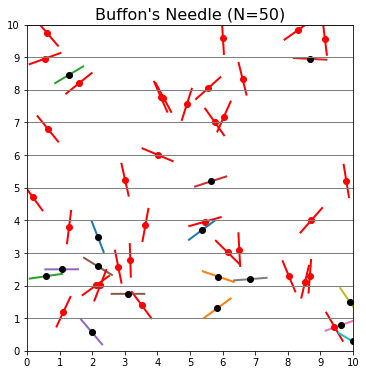

In [14]:
# simple case
L = 1.0 # needle length
d = 1 # floor spacing

def plot_buffon (N, floor_size):
    Xmax, Ymax = floor_size
    
    plt.figure (figsize=(6,6))

    for i in range(N):

        # random x,y inside the floor: center of the needle
        x = Xmax*np.random.rand()
        y = Ymax*np.random.rand()

        # random angle between [0,2pi]: orientation of the needle
        theta = 2*np.pi*np.random.rand()

        # needle tips
        x0 = x + (L/2)*np.cos(theta)
        y0 = y + (L/2)*np.sin(theta)

        x1 = x - (L/2)*np.cos(theta)
        y1 = y - (L/2)*np.sin(theta)
        
        # touching criteria
        if max(np.floor(y0),np.floor(y1))==min(np.ceil(y0),np.ceil(y1)):
            # plot red needles if touching
            plt.plot([x0,x1], [y0,y1], 'r', lw=2)
            plt.plot(x, y,'ro')
        else:
            plt.plot([x0,x1], [y0,y1], lw=2)
            plt.plot(x, y,'ko')

    # plot parallel lines (floor strips)
    strips = np.arange (0, Ymax+0.1, d)
    for s in strips:
        plt.plot ([0,Xmax], [s,s], "grey", lw=1)

    plt.axis('square')
    plt.xlim(0,Xmax)
    plt.ylim(0,Ymax)
    plt.yticks (strips)
    plt.xticks (np.arange (0,Xmax+0.1,d))
    plt.title (f"Buffon's Needle (N={N})", fontsize=16)

    
    
##### define parameters
floor_size = [10,10] # floor size
N = 50 # number of trials

plot_buffon (N, floor_size)    
plt.show()

For the same problem, $N$ is increased to $100,000$. The probability of needles hitting the strips was calculated and compared to the result using the analytical solution shown above.

In [15]:
#calculate probability
N = 100000

def needle_throw(floor_size):
    Xmax, Ymax = floor_size
    
    # random x,y inside the floor: center of the needle
    x = Xmax*np.random.rand()
    y = Ymax*np.random.rand()

    # random theta in [0,2pi]: orientation of the needle
    theta = 2*np.pi*np.random.rand()

    # needle tips
    x0 = x + (L/2)*np.cos(theta)
    y0 = y + (L/2)*np.sin(theta)

    x1 = x - (L/2)*np.cos(theta)
    y1 = y - (L/2)*np.sin(theta)
    
    # if needle hits the line, then it must intersect the boundary
    if max(np.floor(y0),np.floor(y1))==min(np.ceil(y0),np.ceil(y1)):
        return 1
    else:
        return 0
    
start = time.time ()
l = 1
d = 1
floor = [10,10]
probability = sum([needle_throw(floor) for i in range(N)])/N

runtime (start)
print(f"Probability: {probability:1.4f}")
print(f"Exact: {2*l/(np.pi*d):1.4f}")


Runtime: 0.7092 s
Probability: 0.6377
Exact: 0.6366


The calculated probability closely approximates the analytical solution. Buffon's needle problem is often used as a common example in demonstrating Monte Carlo simulation. Different examples of Buffon's needle problem include estimating $\pi$ by using the fact that $\pi \approx \cfrac{P(x)}{2x}.$

# Monte Carlo Error Propagation

Uncertainties are inherent in engineering calculations and measurements because of the limited precision of measurements. For example, it would be difficult, if not impossible, to measure the length of a line in centimeters to its thousandth decimal places ($0.001$) when the ruler is precise only to the tenth decimal place ($0.1$). In such cases, rough guesses would have to be made for the hundredth decimal places, and one can only estimate up to the hundredth decimal places with uncertainties. Error propagation is an useful tool that allows trustworthy, precise parameter estimation.

### ex.) Density Estimation of a Solid

Confidence interval of density can be estimated using Monte Carlo method. First, assume that the uncertainties in density follow normal distribution and are independent. Use the given dimensions of cylindrical solid with diameter $d$, thickness $x$, and mass $m$.

Useful information for confidence intervals:

$\bar{\rho} \pm Z \cfrac{S}{\sqrt{N}}$

$\bar{\rho}$: sample mean of density

$S$: sample standard deviation of density

$N$: number of observations

$Z$: $1.960$ for 95% confidence interval

The exact size parameters $d,x,$ and $m$ are given below. Using these values, density can be calculated followed by the volume of the cylinder. The exact density is calculated as $\approx 9.04 \text{g/cm}^3$.

In [16]:
# actual values
d = 1.6 # diameter in cm
x = 1.1 # thickness in cm
m = 20.0 # mass in g

def volume(d,x):
    V = np.pi*(d/2)**2*x # cylindrical geometry
    return V

V = volume (d,x)
actual_density = m/V
print (f"density: {actual_density:1.2f} g/cm3")

density: 9.04 g/cm3


Let say we make $N$ measurements to tenth decimal places on each of $d,x,$ and $m$ parameters. Errors following the normal distribution are added to the actual dimensions to express $N$ measurements with normal-distributed errors (See *d_rand, x_rand, m_rand*). Then $N$ densities are calculated for each measurement to get the probability distribution of density.

#### N=100

In [17]:
# precisions to 0.1
d_precision = 0.1
x_precision = 0.1
m_precision = 0.1

N = 100

np.random.seed (2)
# error follows the normal dist
d_rand = d + d_precision*np.random.normal (size=N)
x_rand = x + x_precision*np.random.normal (size=N)
m_rand = m + m_precision*np.random.normal (size=N)


V_rand = volume (d_rand, x_rand) # volume
rho_rand = m_rand/V_rand # density

print (f"mean = {rho_rand.mean():1.2f}, std = {rho_rand.std():1.2f}")

mean = 9.26, std = 1.59


Because the precisions are only known to tenth decimals, mean $\approx 9.26$ and std $\approx 1.59$ where the last digits ($6$ and $9$) are estimated.

CI for Density = 9.26 +/- 3.12 g/cm3


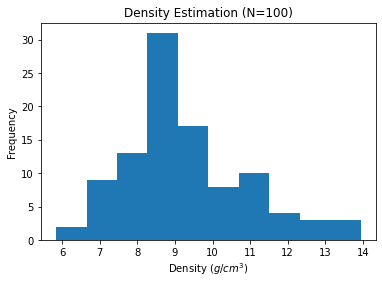

In [18]:
Z = 1.960
s = rho_rand.std()
ci = Z*s
expected_rho = rho_rand.mean()

print (f"CI for Density = {expected_rho:1.2f} +/- {ci:1.2f} g/cm3")

plt.hist (rho_rand, bins=10)
plt.title (f"Density Estimation (N={N})")
plt.xlabel (r"Density ($g/cm^3$)")
plt.ylabel ("Frequency") ;

When $N=100$, the confidence interval is very large, and not much information about density could be gained. Next, $N$ was increased to $300,000$.

#### N=300,000

Density = 9.22 +/- 2.86 g/cm3


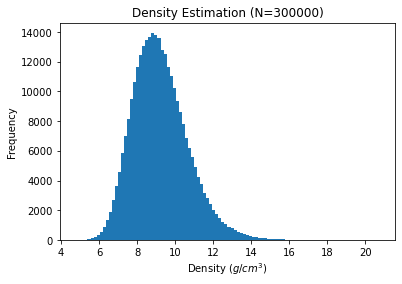

In [19]:
N = 300000

# error follows the normal dist
np.random.seed (1)
d_rand = d + d_precision*np.random.normal (size=N)
x_rand = x + x_precision*np.random.normal (size=N)
m_rand = m + m_precision*np.random.normal (size=N)


V_rand = volume (d_rand, x_rand) # volume
rho_rand = m_rand/V_rand # density

s = rho_rand.std()
ci = Z*s
expected_rho = rho_rand.mean()

print (f"Density = {expected_rho:1.2f} +/- {ci:1.2f} g/cm3")

plt.hist (rho_rand, bins=100)
plt.title (f"Density Estimation (N={N})")
plt.xlabel (r"Density ($g/cm^3$)")
plt.ylabel ("Frequency") ;

When $N$ is increased to $300,000$, the probability distribution of the density becomes much more informative. Although the distribution contains less variance, confidence interval has not been affected greatly. Knowing (measuring) the parameters to more precise level can significantly improve the interval. See the contents below for example.

#### Increasing the known precision

Now let's assume $d$ and $x$ measurements are known to 2nd decimal places.

Let $d_{new} = 1.61 \mathrm{cm}$ and $x_{new} = 1.13 \mathrm{cm}$.


In [20]:
N = 300000

d_new = 1.61 # diameter in cm
x_new = 1.13 # thickness in cm
m = 20.0 # mass in g

actual_vol = volume (d_new,x_new)
actual_rho = m/actual_vol

print (f"actual density: {actual_rho:1.3f} g/cm3")

actual density: 8.694 g/cm3


Actual density: 8.694
CI of density = 8.695 +/- 0.273 g/cm3


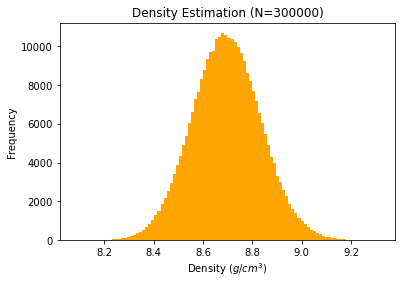

In [21]:
# NEW precisions
d_precision = 0.01
x_precision = 0.01
m_precision = 0.1 # stays the same

# Measurements
np.random.seed (1)
d_rand = d_new + d_precision*np.random.normal (size=N)
x_rand = x_new + x_precision*np.random.normal (size=N)
m_rand = m + m_precision*np.random.normal (size=N)

V_rand = volume (d_rand, x_rand)
rho_rand = m_rand/V_rand

s = rho_rand.std()
ci = Z*s
expected_rho = rho_rand.mean()


print (f"Actual density: {actual_rho:1.3f}")
print (f"CI of density = {expected_rho:1.3f} +/- {ci:1.3f} g/cm3")

plt.hist (rho_rand, bins=100, color="orange")
plt.title (f"Density Estimation (N={N})")
plt.xlabel (r"Density ($g/cm^3$)")
plt.ylabel ("Frequency") ;

By knowing the measurements to a better precision, the CI interval of densities was significantly reduced which means density with random errors are fluctuating less. Compare the marks on the $x$-axis of the plot above to those of previous plot (Screenshot). While the density in the  previous plot ranges from about $5$ to $15$, the density only ranged from about $8.2$ to $9.2$ when the precision of measurements was increased.

![increased_precisions](https://github.com/jhp980828/06625pj/blob/main/imgs/density_estim.png?raw=True)

# Summary

- Monte Carlo method uses Law of Large Numbers and random samples to simulate and model mathematical processes with randomness.
- Examples: dice throw, numerical integration, Buffon's needle, and error propagation using MC method
- It is easy and generalizable for many cases, but computationally expensive due to large number of random simulations.
- It is useful for stochastic modeling in fields like finance and climate science.








# References

**1.** E. Veach, 1997, "Robust Monte Carlo Methods for Light Transport Simulation, Ch.2: Monte Carlo Integration." Stanford University, PhD Dissertation.
https://www.ime.usp.br/~jmstern/wp-content/uploads/2020/04/EricVeach2.pdf


**2.** E. W. Weisstein, "Buffon's Needle Problem." From MathWorld--A Wolfram Web Resource. https://mathworld.wolfram.com/BuffonsNeedleProblem.html


**3.** Wikipedia contributors. (2022, June 28). Buffon's needle problem. In Wikipedia, The Free Encyclopedia. Retrieved from https://en.wikipedia.org/w/index.php?title=Buffon%27s_needle_problem&oldid=1095469404


**4.** B. Toggerson, A. Philbin, "Physics 132 Lab Manual, Subtitle:Understanding Data." University of Massachusetts, Amherst. https://openbooks.library.umass.edu/p132-lab-manual/chapter/monte-carlo-error-propagation/

In [22]:
# Run this cell to generate a pdf from this notebook
# Click the generated links to preview and download it.
# Report errors to Professor Kitchin
from f22_06623 import pdf
%pdf



ModuleNotFoundError: No module named 'f22_06623'